Nodes of graph: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Edges of graph: [(1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (4, 7), (5, 7), (5, 8), (6, 8), (7, 9), (7, 10), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11)]


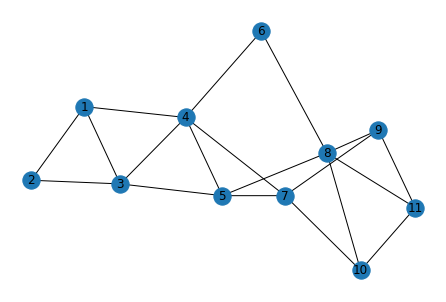

In [148]:
import networkx as nx
import matplotlib.pyplot as plt

class Vertex:
    def __init__(self, name):
        # Name of the vertex
        self.name = name
        # List of pointers to all adjacent vertices
        self._adjacent_nodes_objects = [] 
        # List of names of all adjacent vertices
        self._adjacent_nodes = []
        # List of all edges
        self._edges = []
        
        
    def add_vertices(self, vertices):
        """
        Add a list of vertices
        """
        for vertex in vertices:
            if isinstance(vertex, Vertex) and vertex.name not in self._adjacent_nodes:
                # Add pointer of all vertices to the list
                self._adjacent_nodes_objects.append(vertex)
                # Add actual name of the adjacent vertex
                self._adjacent_nodes.append(vertex.name)
                # Add all edges for the vertex
                self._edges.append((self.name, vertex.name))


    def get_adjacent_nodes_objects(self):
        """
        Returns a list of pointer to all adjacent vertices 
        """ 
        return self._adjacent_nodes_objects
    
    def get_adjacent_nodes(self):
        """
        Returns a list of names of all adjacent vertices
        """
        return self._adjacent_nodes
    
    def get_edges(self):
        """
        Return a list of all edges 
        """
        return self._edges
    

class Graph:
    def __init__(self):
        # Dictionary of pointers of all vertices in th graph
        self._graph_object = {}
        # Dictionary of all vertices name
        self._graph = {}
        # List of all edges in the graph
        self._graph_edges = []
    
    
    def add_vertices(self, vertices):
        """
        Accpets a list of pointers to vertices
        """
        for vertex in vertices:
            if isinstance(vertex, Vertex):
                # Adds a vertex to the graph with pointers toall adjacent vertices 
                self._graph_object[vertex.name] = vertex.get_adjacent_nodes_objects()
                # Add vertex to the graph with names of all adjacent vertices
                self._graph[vertex.name] = vertex.get_adjacent_nodes()
                # Add edges to the graph
                self._graph_edges.extend(vertex.get_edges())
                
    
    def get_graph_object(self):
        """
        Returns a dictionary of pointer to all vertices in the graph
        """
        return self._graph_object
    
    
    def get_graph(self):
        """
        Returns a dictionary of all vertices in the graph
        """
        return self._graph
    
    def get_edges(self):
        """
        Retuns a list of all edges in the graph
        """
        return self._graph_edges
 

    def dfs_paths(self, start, goal, path=None):
#         print(f'Start: {start} Goal: {goal} Path: {path}')
        if path is None:
            path = [start]
        if start == goal:
            yield path
        for next in set(self._graph[start]) - set(path):
#             print(f'Difference: {set(self._graph[start]) - set(path)}')
#             print(f'Next: {next} Path: {path + [next]}\n')
            yield from self.dfs_paths(next, goal, path + [next])
 

    def find_shortest_path_dfs(self, start, goal, path=None): 
        all_pathes = list(self.dfs_paths(start, goal, path=None))
        min_list = min(all_pathes, key = len) 
        return min_list
 
        
        
    def bfs_paths(self, start, goal):
        queue = [(start, [start])]
        while queue:
            (vertex, path) = queue.pop(0)
            for next in set(self._graph[vertex]) - set(path):
                if next == goal:
                    yield path + [next]
                else:
                    queue.append((next, path + [next]))
                
                    
                    
    def find_shortest_path_bfs(self, start, goal):
        try:
            shortes_path = next(self.bfs_paths(start, goal))
            return shortes_path
        except StopIteration:
            return None
        
    def get_shortest_path_edges(self, start, goal):
        """
        Return a list of edges from shortest path
        """
        shortest_path_edges = []
        shortest_path = self.find_shortest_path_bfs(start, goal)
        
        for i in range(0,len(shortest_path)):
            if i != len(shortest_path) - 1:
                shortest_path_edges.append((shortest_path[i], shortest_path[i+1])) 
        return shortest_path_edges
        
    def exclude_edges(self, edges):
        """
        Return a differnce of edges that are in the graph and passed edges
        """
        return [edge for edge in self._graph_edges if edge not in edges]
        
                    
# List of vertices name 
strings_name = ['one', 
                'two',
                'three',
                'four',
                'five',
                'six',
                'seven',
                'eight',
                'nine',
                'ten',
                'eleven']

# Numerical representation of all vertices
string_value = [1,2,3,4,5,6,7,8,9,10,11]

# Concatenate to dictionary 
vertices = dict(zip(strings_name, string_value))

# Insnatiate vertices
for key, val in vertices.items():
    # Covert string to variable name
    globals()[key] = Vertex(val)
    

# Add vertices to vertex
one.add_vertices([two, three, four]) 
two.add_vertices([three]) 
three.add_vertices([four, five]) 
four.add_vertices([five, six, seven])
five.add_vertices([seven, eight])
six.add_vertices([eight])
seven.add_vertices([nine, ten])
eight.add_vertices([nine, ten, eleven]) 
nine.add_vertices([eleven])
ten.add_vertices([eleven])

# Instantiate graph 
graph = Graph()

# Add vertices to graph:
vertex_list = []
for vertex in strings_name:
    vertex_list.append(globals()[vertex])
graph.add_vertices(vertex_list)

# Visualization 
# Use networkx python library 
g = nx.Graph()
g.add_nodes_from(string_value)

# Add all edges
for k,v in graph.get_edges():
    g.add_edge(k, v)

        
print(f'Nodes of graph: {g.nodes()}')
print(f'Edges of graph: {g.edges()}')

nx.draw(g, with_labels= True)
plt.savefig("project_2_graph.png")
plt.show()

In [140]:
%%time

start = 1
goal = 11

print(f'The shortes path from vertex({start}) to vertex({goal}) by using DFS algorithm:',
      f'{graph.find_shortest_path_dfs(start, goal)}')

The shortes path from vertex(1) to vertex(11) by using DFS algorithm: [1, 3, 5, 8, 11]
CPU times: user 521 µs, sys: 179 µs, total: 700 µs
Wall time: 578 µs


In [149]:
%%time

start = 1
goal = 11

print(f'The shortes path from vertex({start}) to vertex({goal}) by using BFS algorithm:',
      f'{graph.find_shortest_path_bfs(start, goal)}')

The shortes path from vertex(1) to vertex(11) by using BFS algorithm: [1, 3, 5, 8, 11]
CPU times: user 263 µs, sys: 81 µs, total: 344 µs
Wall time: 308 µs


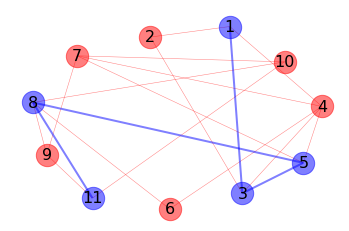

In [120]:
import matplotlib.pyplot as plt
import networkx as nx

start = 1
goal = 11

# Visualization
# Instantiate a graph
G = nx.Graph()
G.add_nodes_from(string_value)
pos = nx.spring_layout(G)

# Find shortest path
shortest_path_vertices = graph.find_shortest_path_bfs(start, goal)
# Get vertices that are not in shortest path
rest_vertices = [vertex for vertex in string_value if vertex  not in shortest_path]

# Draw Vertices
options = {"node_size": 500, "alpha": 0.5}
nx.draw_networkx_nodes(G, pos, nodelist=rest_vertices, node_color="r", **options)
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_vertices, node_color="b", **options)

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Get a list of edegs ib the shortest path
shortest_path_edges = graph.get_shortest_path_edges(1,11)
# Get a list of edges that are not in a shortest path
rest_edges = graph.exclude_edges(graph.get_shortest_path_edges(1,11))

# Draw in red edges that are not in shortest path
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=rest_edges,
    width=0.5,
    alpha=0.5,
    edge_color="r",
)

# Draw in blue edges that are in shortest path
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=shortest_path_edges,
    width=2,
    alpha=0.5,
    edge_color="b",
)

# Create Label
labels = {}
for i in string_value:
    labels[i] = str(i)
    
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis("off")
plt.savefig("project_2_graph2.png")
plt.show()